In [1]:
import os, sys, fitsio
sys.path.append('../')
import numpy as np
import healpy as hp
from run_DMASS import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import healpy as hp

In [3]:
rootdir = '../output/st82_halfhalf_numdensity_spatial/'
figoutdir = rootdir + '/figure/'
os.system('mkdir '+figoutdir)

256

In [4]:
#import pickle
#filename = open('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/gold_st82_XD_no_full_tol1e5.pkl')
#pic = pickle.load(filename)

In [5]:
# import DMASS

#dmass = fitsio.read(rootdir+'spt.fits')
dmass_st82_even = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82_highra')
dmass_st82_odd = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82_lowra')
dmass_st82_even = Cuts.keepGoodRegion(dmass_st82_even)
dmass_st82_odd = Cuts.keepGoodRegion(dmass_st82_odd)
#dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82.fits')
#dmass = fitsio.read(rootdir+'dmass_spt_sys_v3.fits')
#dmass = dmass[dmass['EachProb_CMASS'] > 0.00]
print 'dmass sample size :', np.sum(dmass_st82_even['CMASS_PROB']), np.sum(dmass_st82_odd['CMASS_PROB'])


cmass = fitsio.read('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5_baomask///train_sample_des.fits')
cmass = Cuts.keepGoodRegion(cmass)
#healConfig={}
#healConfig['out_nside'] = 64
#cmass = HealPixifyCatalogs(catalog=cmass, healConfig=healConfig, ratag='RA', dectag = 'DEC')

evenmask = cmass['RA'] > 339
#evenmask = gold_st82['RA'] > 339

#evenmask = cmass['HEALIndex']%2 == 0
cmass_even = cmass[evenmask]
cmass_odd = cmass[~evenmask]
print 'cmass sample size :', cmass_even.size, cmass_odd.size, cmass.size

#dmass = appendColumn(dmass, name = 'WEIGHT', value = dmass['EachProb_CMASS'], dtypes=float)
#dmass_st82 = appendColumn(dmass_st82, name = 'WEIGHT', value = dmass_st82['EachProb_CMASS'], dtypes=float)

#print 'dmass st82 sample size :', np.sum(dmass_st82['CMASS_PROB'])
#print 'cmass sample size :', cmass.size


--------------------------------
 calling catalog
--------------------------------
dmass_st82_highra.fits

--------------------------------
 calling catalog
--------------------------------
dmass_st82_lowra.fits
dmass sample size : 5860.1192427372225 6358.345886268865
cmass sample size : 5758 5814 11572


In [7]:
cmass.size, cmass_even.size, cmass_odd.size

(11572, 5758, 5814)

In [10]:
#random = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt_masked.fits')


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt_masked.fits


In [10]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask = callingY1GoldMask( nside = 4096 )
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = np.sum(GoldMask_spt['FRAC']) #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  np.sum(GoldMask_st82['FRAC']) # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [11]:
ST82Maparea, SPTMaparea

(113.34792842737247, 1204.3633578044362)

In [12]:

random = uniform_random_on_sphere(GoldMask_st82, size = 100 * dmass_st82_even.size)
random = Cuts.keepGoodRegion(random)
#rand = Cuts.keepY1GoldRegion(rand)
#rand = random[ random['DEC'] < -3.0 ]
rand_st82 = random[ random['DEC'] > -3.0 ]

#healConfig={}
#healConfig['out_nside'] = 64
#rand_st82 = HealPixifyCatalogs(catalog=rand_st82, healConfig=healConfig, ratag='RA', dectag = 'DEC')

evenmask = rand_st82['RA']>339
rand_st82_even = rand_st82[evenmask]
rand_st82_odd = rand_st82[~evenmask]

print rand_st82_even.size, rand_st82_odd.size

#rand2 = cutcat20(rand2)

"""
random = uniform_random_on_sphere(GoldMask, size = 10 * dmass.size)
random = Cuts.keepGoodRegion(random)
#rand = Cuts.keepY1GoldRegion(rand)
rand2 = random[ random['DEC'] < -3.0 ]
rand_st82_2 = random[ random['DEC'] > -3.0 ]
#rand2 = cutcat20(rand2)

print rand.size, dmass.size
#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)
#rand_train = Cuts.keepGoodRegion(rand_train)
random = None
"""


11511727 11859756


"\nrandom = uniform_random_on_sphere(GoldMask, size = 10 * dmass.size)\nrandom = Cuts.keepGoodRegion(random)\n#rand = Cuts.keepY1GoldRegion(rand)\nrand2 = random[ random['DEC'] < -3.0 ]\nrand_st82_2 = random[ random['DEC'] > -3.0 ]\n#rand2 = cutcat20(rand2)\n\nprint rand.size, dmass.size\n#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)\n#rand_train = Cuts.keepGoodRegion(rand_train)\nrandom = None\n"

In [13]:

#train_sample = esutil.io.read('../output/sfd_train_photo_SamPle_nozband_ran10_3/cmass_in_st82.fits')

#mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], dmass_st82['RA'], \
#                                     dmass_st82['DEC'],2./3600, maxmatch=1)
#cmass_mask = np.zeros(dmass_st82.size, dtype=bool)
#cmass_mask[mg2] = 1
#clean_cmass_data_des, nocmass = dmass_st82[cmass_mask], dmass_st82[~cmass_mask]

train_sample = cmass.copy()

mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], dmass_st82_even['RA'], \
                                     dmass_st82_even['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82_even.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des_even, nocmass_even = dmass_st82_even[cmass_mask], dmass_st82_even[~cmass_mask]


mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], dmass_st82_odd['RA'], \
                                     dmass_st82_odd['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82_odd.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des_odd, nocmass_odd = dmass_st82_odd[cmass_mask], dmass_st82_odd[~cmass_mask]

In [14]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

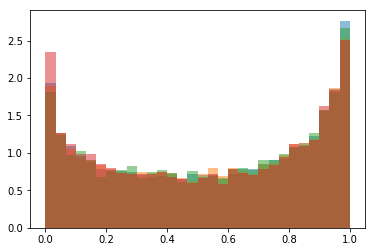

In [15]:

pbin = np.linspace(0,1,31)

fig, ax = plt.subplots()
_ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=True, alpha= 0.5, weights = dmass_st82_even['CMASS_PROB'] )
_ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
           normed=True, alpha= 0.5, weights = dmass_st82_odd['CMASS_PROB'] )
#_ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#           normed=True, alpha= 0.5, weights = dmass_st82['CMASS_PROB'] )
_ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )
_ = ax.hist( clean_cmass_data_des_odd['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )

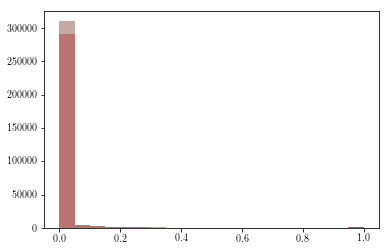

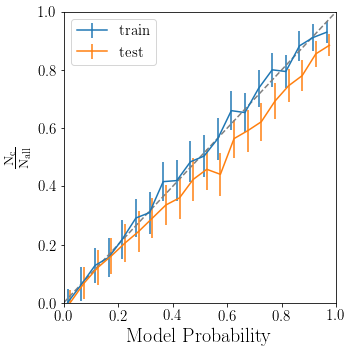

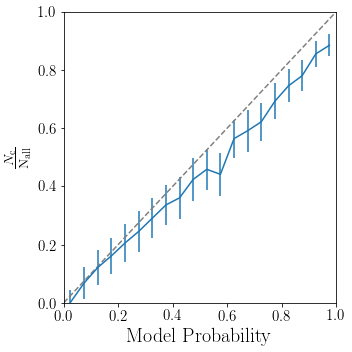

In [17]:

pbin, ps = np.linspace(0,1,21, retstep=True)

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax = plt.subplots()
_ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=True, alpha= 0.5, weights = dmass_st82_even['CMASS_PROB'] )
_ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
           normed=True, alpha= 0.5, weights = dmass_st82_odd['CMASS_PROB'] )
#_ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#           normed=True, alpha= 0.5, weights = dmass_st82['CMASS_PROB'] )
#_ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )
N_cmass_even, _, _ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
N_all_even, _, _ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=False, alpha= 0.5 )

N_cmass_odd, _, _ = ax.hist( clean_cmass_data_des_odd['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
N_all_odd, _, _ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
            normed=False, alpha= 0.5 )

#N_cmass, _, _ = ax.hist( clean_cmass_data_des['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
#N_all, _, _ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#            normed=False, alpha= 0.5 )

fig, ax = plt.subplots(figsize = (5,5))
#ax.plot(pbin[:-1]+ps/2., N_cmass*1./N_all )
ax.errorbar(pbin[:-1]+ps/2.-0.01 , N_cmass_even*1./N_all_even, yerr = 1./np.sqrt(N_cmass_even), fmt='', label='train'  )
ax.errorbar(pbin[:-1]+ps/2., N_cmass_odd*1./N_all_odd, yerr = 1./np.sqrt(N_cmass_odd),fmt='', label='test' )
#ax.errorbar(pbin[:-1]+ps/2., N_cmass*1./N_all, yerr = 1./np.sqrt(N_cmass), label='full' )
ax.plot([0,1], [0,1], ls='--', color='grey')
ax.set_ylim(0,1)
ax.set_xlim(0,1)

ax.set_xlabel(r'${\rm Model~Probability}$', fontsize = 20)
ax.set_ylabel(r'$\frac{\rm N_{c}}{\rm N_{all}}$', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
ax.legend(loc='best', fontsize=15)
fig.tight_layout()
fig.savefig('../paper_figure/model_prob_train_spatial.pdf')

fig, ax = plt.subplots(figsize = (5,5))
#ax.plot(pbin[:-1]+ps/2., N_cmass*1./N_all )
#ax.errorbar(pbin[:-1]+ps/2.-0.01 , N_cmass_even*1./N_all_even, yerr = 1./np.sqrt(N_cmass_even), fmt='', label='train'  )
ax.errorbar(pbin[:-1]+ps/2., N_cmass_odd*1./N_all_odd, yerr = 1./np.sqrt(N_cmass_odd),fmt='', label='test' )
#ax.errorbar(pbin[:-1]+ps/2., N_cmass*1./N_all, yerr = 1./np.sqrt(N_cmass), label='full' )
ax.plot([0,1], [0,1], ls='--', color='grey')
ax.set_ylim(0,1)
ax.set_xlim(0,1)

ax.set_xlabel(r'${\rm Model~Probability}$', fontsize = 20)
ax.set_ylabel(r'$\frac{N_{\rm c}}{\rm N_{all}}$', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
#ax.legend(loc='best', fontsize=15)
fig.tight_layout()
fig.savefig('../paper_figure/model_prob_test_spatial.pdf')

0.0 6642.029684236465 6354.456661902469
0.001 6611.830354759245 6325.557891840383
0.002 6589.2100731573955 6303.7841521633845
0.003 6568.883646792504 6284.036054715164
0.004 6550.363551438668 6265.703756033771
0.005 6532.178023963603 6248.728748646414
0.006 6515.338447528913 6232.769605322137
0.007 6499.497173406395 6217.374636465673
0.008 6484.2044039329 6202.743637639961
0.009000000000000001 6469.185409448837 6188.709680280634
0.01 6455.427206649112 6175.173750403913
0.011 6442.200562424443 6161.9519861243125
0.012 6428.735937836025 6149.211116958344
0.013000000000000001 6415.239222484904 6136.943440576358
0.014 6402.968102001631 6123.986064871951
0.015 6390.199099606551 6112.197360547312


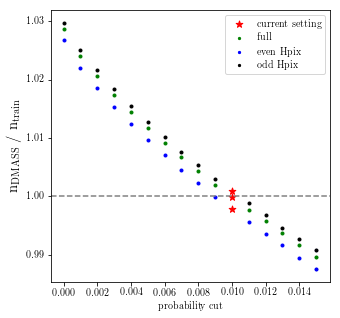

In [176]:
cmass_numdensity_even = cmass_even.size * 1./rand_st82_even.size
cmass_numdensity_odd = cmass_odd.size * 1./rand_st82_odd.size
cmass_numdensity = cmass.size * 1./rand_st82.size

fig, ax = plt.subplots(figsize = (5,5))

i=0
for pc in pth_bin[:16] :
    #print i,
    
    #dmass_spt_pc, _ = resampleWithPth( gold_spt_prob_ran, pstart = pc)
    dc = dmass_st82[dmass_st82['CMASS_PROB'] > pc] 
    dc_even = dmass_st82_even[dmass_st82_even['CMASS_PROB'] > pc] 
    dc_odd = dmass_st82_odd[dmass_st82_odd['CMASS_PROB'] > pc] 
    weight = np.sum(dc['CMASS_PROB'] )
    weight_even = np.sum(dc_even['CMASS_PROB'] )
    weight_odd = np.sum(dc_odd['CMASS_PROB'] )
    #print weight, weight82, rand2.size, rand_
    
    numdensity = weight*1./rand_st82.size * 1./cmass_numdensity
    numdensity_even = weight_even*1./rand_st82_even.size * 1./cmass_numdensity_even
    numdensity_odd = weight_odd*1./rand_st82_odd.size * 1./cmass_numdensity_odd
    if pc == 0.01 : 
        ax.scatter(0.01, numdensity, marker='*', color='red', s=50)
        ax.scatter(0.01, numdensity_even, marker='*', color='red', s=50)
        ax.scatter(0.01, numdensity_odd, marker='*', color='red', s=50, label = 'current setting')
    else :  
        ax.plot(pc, numdensity, 'g.')
        ax.plot(pc, numdensity_even, 'k.')
        ax.plot(pc, numdensity_odd, '.', c='blue')
    print pc, weight_even, weight_odd
    
    i+=1
    
ax.axhline(y = 1.0, ls = '--', color='grey')
ax.scatter(pc, numdensity, marker='o', color='green', s=5, label = 'full')
ax.scatter(pc, numdensity_even, marker='o', color='blue', s=5, label = 'even Hpix')
ax.scatter(pc, numdensity_odd, marker='o', color='black', s=5, label = 'odd Hpix')

#ax.scatter(0.01, numdensity_s82, marker='*', color='red', s=150)
#ax.scatter(0.01, numdensity, marker='*', color='red', s=150, label = 'current setting')
ax.set_xlabel('probability cut')
ax.set_ylabel(r'$\rm n_{\rm DMASS}$ / $\rm n_{\rm train}$', fontsize = 15)
#ax.text(0.007, 0.925, 'bin size = 0.0001')
ax.legend()
fig.savefig(figoutdir + 'prob_test_num_density.png')    

In [12]:
pth_bin[:16]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015])

In [16]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

In [23]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = rootdir+'/act/'
os.system('mkdir '+basedir)

dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
for pc in pth_bin[0:21] :
    #dc = dmass[dmass['WEIGHT'] > pc] 
    #randind = np.random.choice( range(dc.size), size = dc.size/10)
    
    
    pcut = dmass['EachProb_CMASS'] > pc
    angular_correlation_poisson(data = dmass[pcut], rand = random, nbins=10, 
                    weight_data = True, weight_rand = None,
                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk50'.format(pc), dir = rootdir+'/act/')
    print 'cut :', pc,  'sample size : ', dmass[pcut].size
    #angular_correlation(data = dmass[pcut], rand = random, nbins=10, njack = 100, weight=[True, False],
    #                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk100'.format(pc), dir = basedir)

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.000_nbins10_jk50.txt
cut : 0.0 sample size :  6777228
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.001_nbins10_jk50.txt
cut : 0.001 sample size :  1534301
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.002_nbins10_jk50.txt
cut : 0.002 sample size :  1227405
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.003_nbins10_jk50.txt
cut : 0.003 sample size :  1068655
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.004_nbins10_jk50.txt
cut : 0.004 sample size :  965011
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.005_nbins

In [40]:
len(pth_bin[:16]), len(filenames)

(16, 16)

err db, db / br1, brmin, br2 : 0.028844271515027886 0.038431122021409525 1.005048269689014 1.019592032914497 1.0338925412040418
err db, db / br1, brmin, br2 : 0.02889359647580836 0.03236377416345371 1.0018985777772271 1.0164480475295652 1.0307921742530355
err db, db / br1, brmin, br2 : 0.024157447446197855 0.023619703889090626 0.9998199477833982 1.0119509913833735 1.023977395229596
err db, db / br1, brmin, br2 : 0.024315620434039453 0.023619703889090626 0.9997399141672777 1.0119509913833735 1.0240555346013172
err db, db / br1, brmin, br2 : 0.028039333787853726 0.017569308515205773 0.9947652545109908 1.0088625083291294 1.0228045882988446
err db, db / br1, brmin, br2 : 0.02768940781208118 0.017101588633391174 0.9946848141878487 1.008624540992801 1.0223742219999299
err db, db / br1, brmin, br2 : 0.027486157025174873 0.017413438664629632 0.9949663268665526 1.0087831921209538 1.0224524838917275
err db, db / br1, brmin, br2 : 0.02793257600779353 0.002595459042053383 0.9872157408509028 1.0012

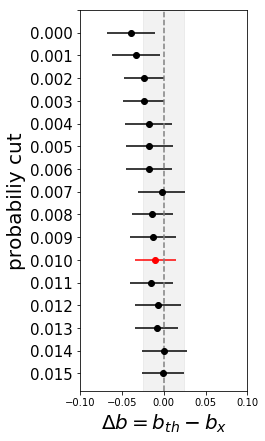

In [55]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['{:0.3f}'.format(pc) for pc in pth_bin[:16]]

filenames = [ basedir+'acf_auto_poisson_dmass_pcut{:0.3f}_nbins10_jk50.txt'.format(pc) for pc in pth_bin[:16]]
#covnames = [ basedir+'acf_auto_dmass_pcut{:0.5f}_nbins10_jk50.cov'.format(pc) for pc in pth_bin[::5][:23]]
covnames = [ basedir +'acf_auto_dmass_pcut{:0.3f}_nbins10_jk100.cov'.format(pc) for pc in pth_bin[:16]]

for j in range(1, len(pth_bin[:16])+1):
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if pth_bin[:16][j-1] == 0.01 : 
        color = 'r'
        ax.axvspan(- err_brelw*2., err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=0, color = 'grey', ls='--')
    else : color = 'k'  
   
    ax.errorbar(2.-2*brelw, len(labels_SP)-j, xerr =err_brelw*2., fmt='-o', color=color)
    
ax.set_xlabel(r'$\Delta b = b_{th} - b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(-0.1, 0.1)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(len(labels_SP)+1))
ax.set_ylabel('probabiliy cut', fontsize = 20)
labels = labels_SP[::-1] + ['']
ax.set_yticklabels( labels, fontsize = 15) 
fig.savefig(figoutdir + 'sys_bias_pcut.png')
print 'pic save to ', figoutdir + 'sys_bias_pcut.png'






In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin[:101])
ax.set_xlabel('Probability')
ax.set_ylabel('N galaxy')
ax.text(0.005, 175, 'bin size = 0.0001', fontsize = 12)

In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin)

In [ ]:
from systematics_module.contCorrection import doVisualization_ngal
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [ ]:
properties = ['GE', 'NSTARS_allband']
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )

In [ ]:
sysoutdir = rootdir+'/sys/'

In [ ]:
for pc in pth_bin[::5][:23]:
#pc = 0
    suffix = 'pcut_{:0.4f}'.format(pc)

    for p in ['GE', 'NSTARS_allband'] : 
        
        dc = dmass_spt_pc[dmass_spt_pc['EachProb_CMASS'] > pc ]
        print pc, dc.size
        sys_ngal(cat1 = dc, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
             FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
             reweight= None, nside = 4096,
             suffix=suffix, outdir=sysoutdir)

        doVisualization_ngal(property = p, nside = 4096, kind = 'SPT', suffix=suffix, \
                             inputdir=sysoutdir, outdir=figoutdir)